In [2]:
# import  Libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
# Load the dataset 
df = pd.read_csv('data/benin-malanville.csv')
print(df)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  C

# Summary Statistics

In [ ]:
#For Calculating statastical values

df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


# Data Quality Check

In [17]:
# checking for missing values

df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [3]:
# List of columns
columns = ['GHI', 'DNI', 'DHI']

# Find rows with negative values in any of these columns
incorrect_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]

for col in columns:
    count_incorrect_values = (df[col] < 0).sum()
    print(f"Negative values in {col}: {count_incorrect_values}")

Negative values in GHI: 258847
Negative values in DNI: 275987
Negative values in DHI: 259182


In [49]:
# replace Negative values with 'nan'
for col in columns:
    df.loc[df[col] < 0, col] = np.nan

# Fll those nan with the mean removing affects our analysis
for col in columns:
    df[col].fillna(df[col].mean())  # Replace NaN with mean

In [26]:
# Columns to check for outliers
columns = ['ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for the specified columns
z_scores = df[columns].apply(zscore)

# Identify rows with outliers (Z-score > 3 or < -3)
outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

In [32]:
# Remove outliers from the dataset
df[~((z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1))]

C:\Users\pc\AppData\Local\Temp\ipykernel_3788\2543373271.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~((z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1))]


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


# Time Series Analysis

In [10]:
# Convert Timestamp to datetime
df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert to datetime and handle invalid dates
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract day, month, and year
df.loc[:, 'Date'] = df['Timestamp'].dt.date
df.loc[:, 'Month'] =df['Timestamp'].dt.month
df.loc[:, 'Year'] = df['Timestamp'].dt.year

In [11]:
# Aggregate Data daily
# Daily mean
daily =df.groupby('Date')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

# Monthly mean
monthly = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

# Yearly mean
yearly = df.groupby('Year')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

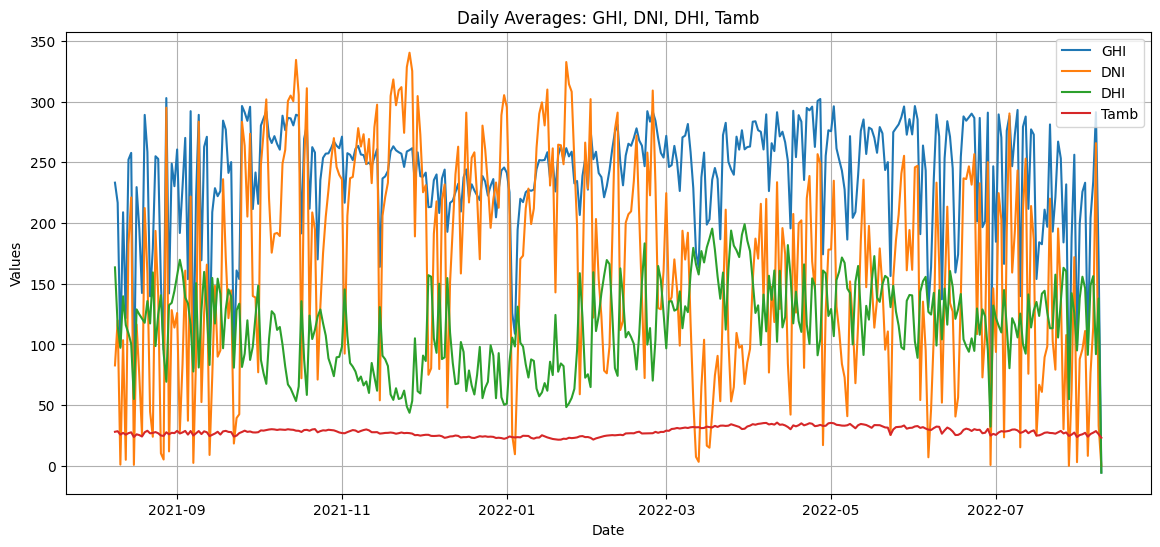

In [ ]:
# Show their daily status 
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(daily['Date'], daily[col], label=col)
plt.figure(figsize=(15, 5))
plt.title('Daily Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_13800\319560018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


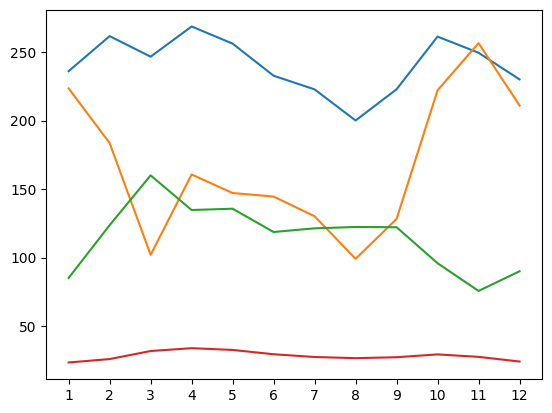

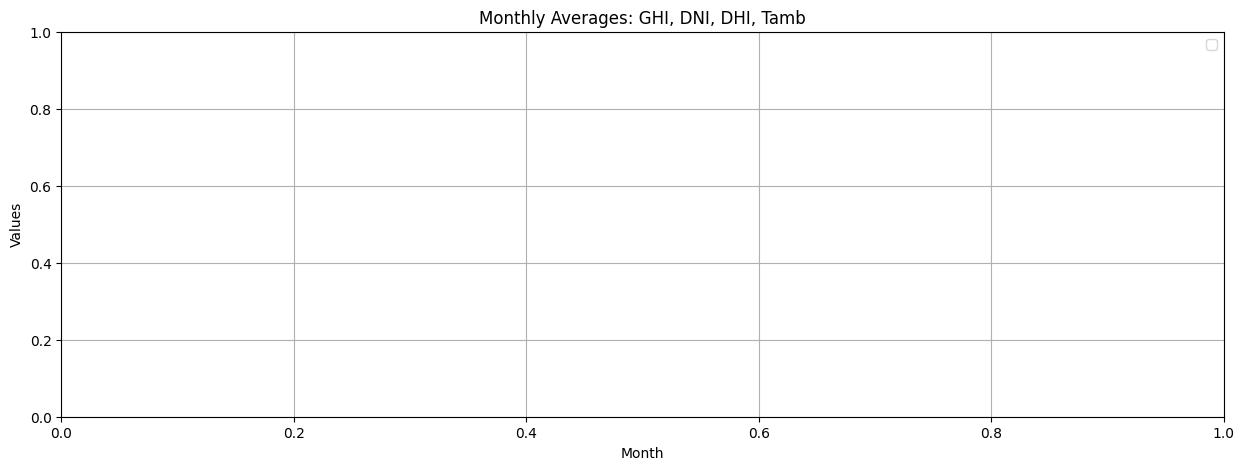

In [19]:
# Show their monthly status 
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(monthly['Month'].astype(str), monthly[col], label=col)
plt.figure(figsize=(15, 5))
plt.title('Monthly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_13800\3045028508.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


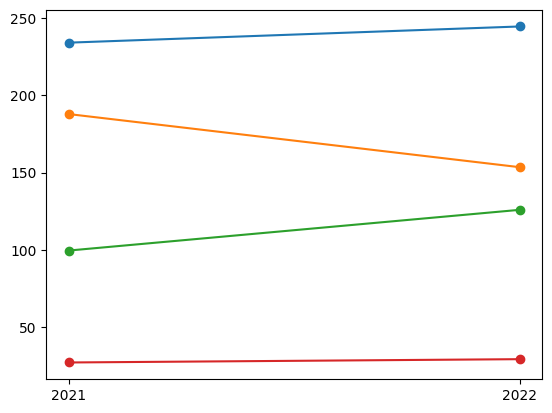

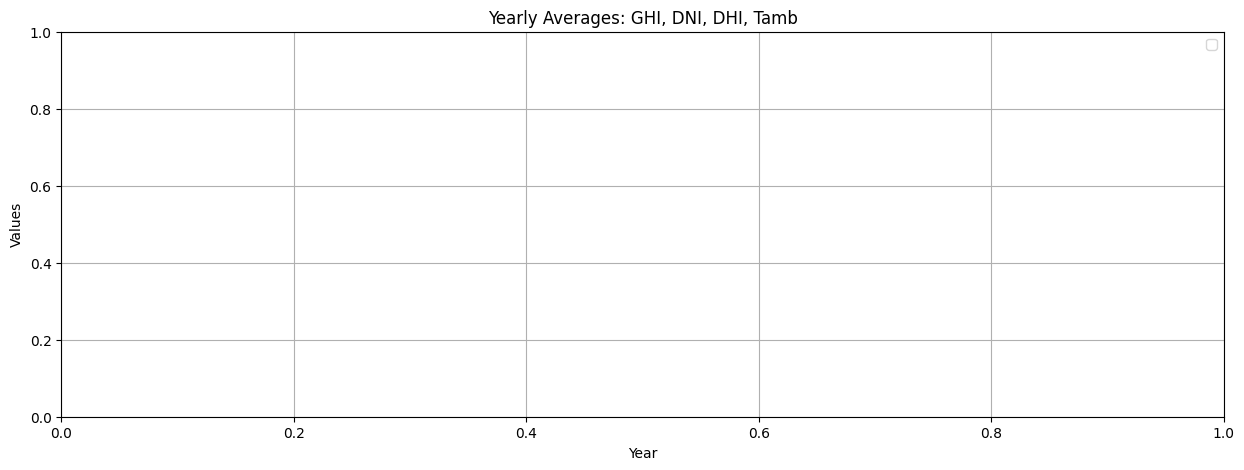

In [15]:
# Show their yearly status 
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(yearly['Year'].astype(str), yearly[col], marker='o', label=col)
plt.figure(figsize=(15, 5))
plt.title('Yearly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

# Correlation Analysis

<Axes: >

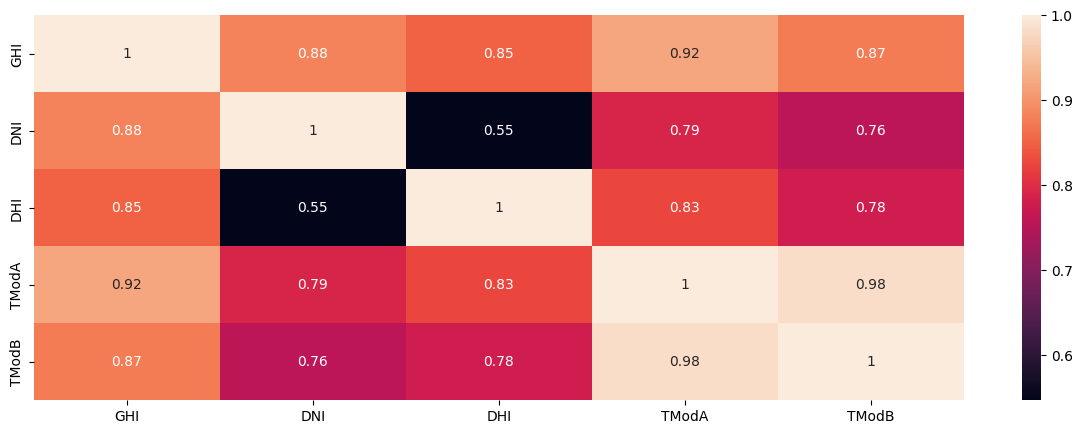

In [20]:
corr=df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True)

# Wind Analysis

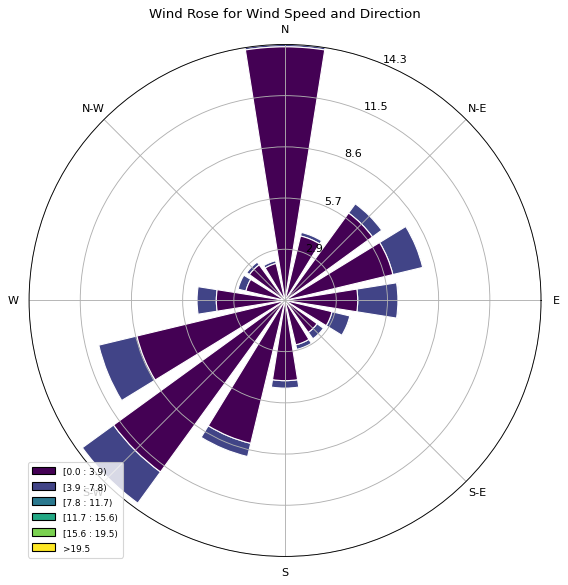

In [9]:
# Radial bar plot for wind direction
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose for Wind Speed and Direction')
plt.show()

# Temperature Analysis

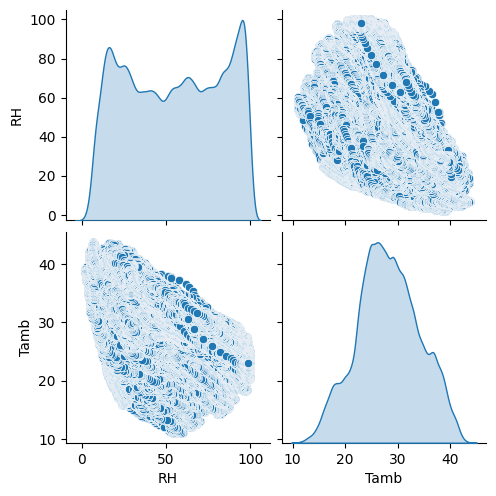

In [23]:
sns.pairplot(df, vars=['RH', 'Tamb'], diag_kind='kde')
plt.show()

# Histograms

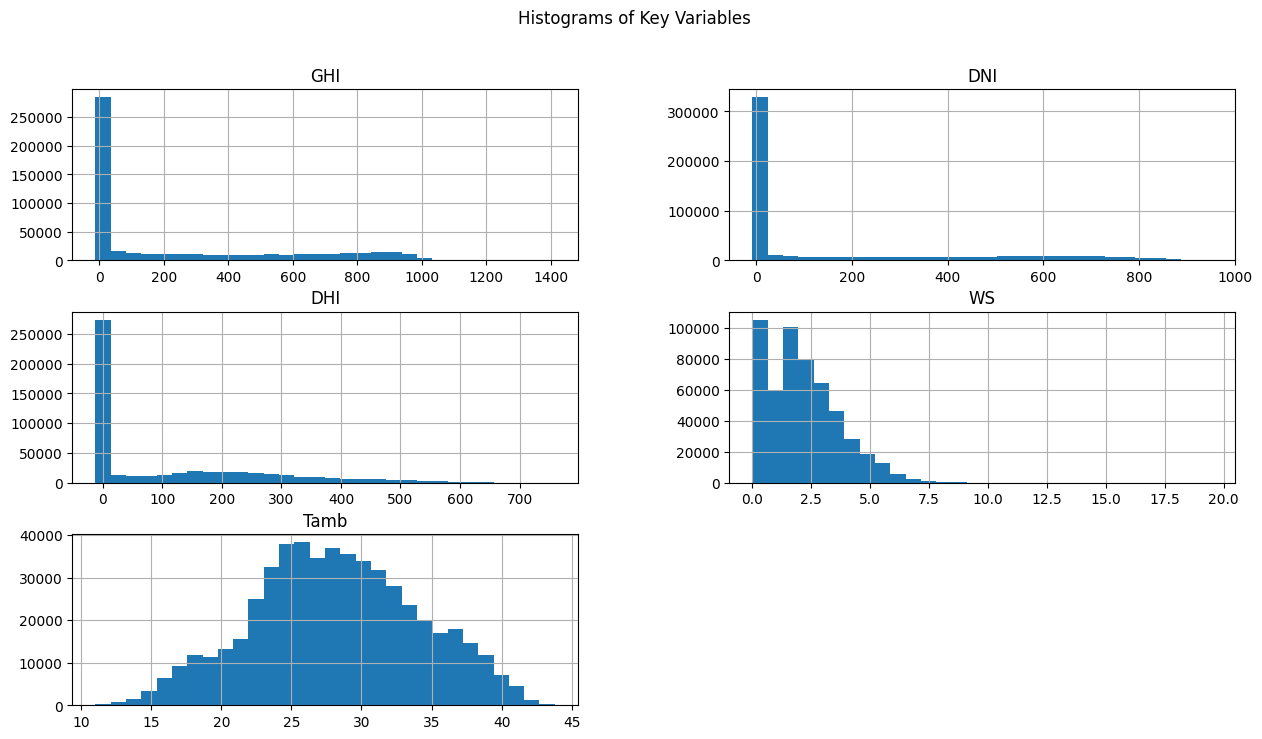

In [25]:
# Plot histograms for key variables
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df[variables].hist(bins=30, figsize=(15, 8))
plt.suptitle('Histograms of Key Variables')
plt.show()

In [33]:
# Convert Timestamp to datetime
df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'].astype(str))

# Convert to datetime and handle invalid dates
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract day, month, and year
df.loc[:, 'Date'] = df['Timestamp'].dt.date
df.loc[:, 'Month'] =df['Timestamp'].dt.month
df.loc[:, 'Year'] = df['Timestamp'].dt.year

# Bubble Charts

C:\Users\pc\AppData\Local\Temp\ipykernel_13800\2811753802.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 1500x500 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(bubble_chart, label='Wind Speed')


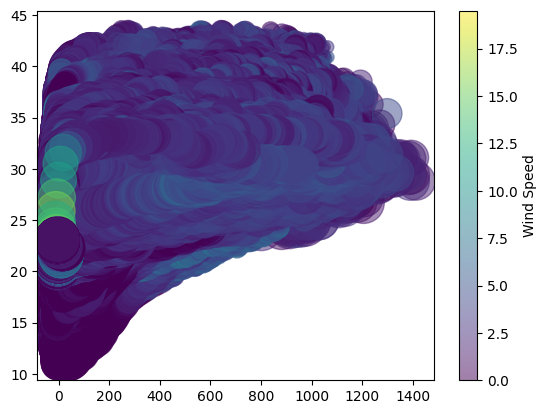

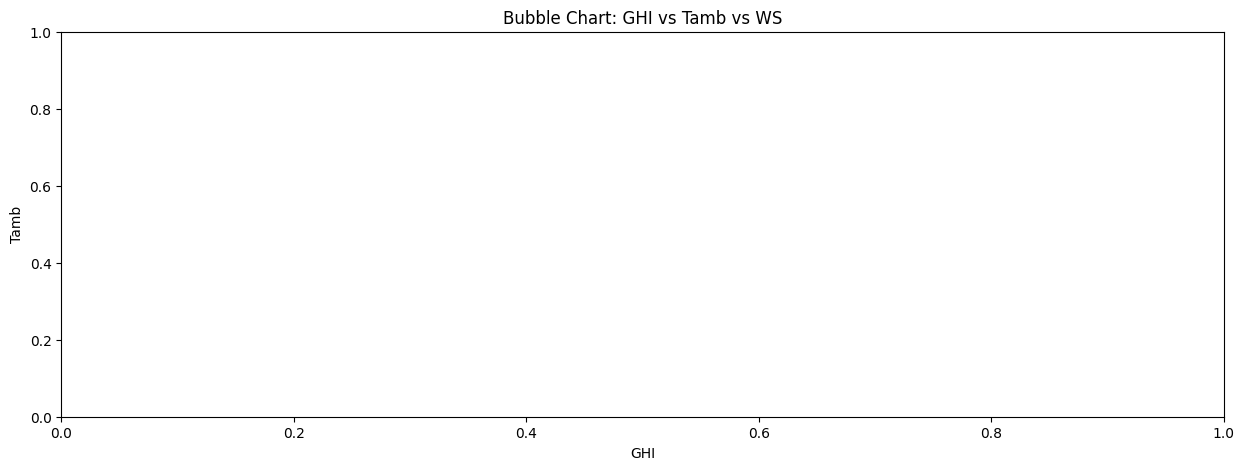

In [29]:
# Bubble chart: GHI vs Tamb vs WS with bubble size as RH
bubble_chart = plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, c=df['WS'], alpha=0.5, cmap='viridis')
plt.figure(figsize=(15, 5))
plt.colorbar(bubble_chart, label='Wind Speed')
plt.title('Bubble Chart: GHI vs Tamb vs WS')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()